In [90]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score
from sklearn.feature_selection import chi2

In [58]:
help(load_boston)

Help on function load_boston in module sklearn.datasets._base:

load_boston(*, return_X_y=False)
    Load and return the boston house-prices dataset (regression).
    
    ==============   ==============
    Samples total               506
    Dimensionality               13
    Features         real, positive
    Targets           real 5. - 50.
    ==============   ==============
    
    Read more in the :ref:`User Guide <boston_dataset>`.
    
    Parameters
    ----------
    return_X_y : bool, default=False.
        If True, returns ``(data, target)`` instead of a Bunch object.
        See below for more information about the `data` and `target` object.
    
        .. versionadded:: 0.18
    
    Returns
    -------
    data : :class:`~sklearn.utils.Bunch`
        Dictionary-like object, with the following attributes.
    
        data : ndarray of shape (506, 13)
            The data matrix.
        target : ndarray of shape (506, )
            The regression target.
        fil

In [72]:
load_boston().data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [107]:
#Juntando en un mismo array los datos y el target value
boston_dataset = np.column_stack((load_boston().data, load_boston().target))
boston_columns = list(load_boston().feature_names)
boston_columns.append('target')

In [108]:
boston_columns

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'target']

In [109]:
dataset = pd.DataFrame(boston_dataset, columns = boston_features)
dataset.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [110]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, shuffle = True, random_state = 7)

In [112]:
X_train = sm.add_constant(X_train, prepend=True)

In [113]:
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     100.4
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          1.40e-115
Time:                        15:05:08   Log-Likelihood:                -1174.7
No. Observations:                 404   AIC:                             2377.
Df Residuals:                     390   BIC:                             2433.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.5542      5.656      4.164      0.0

In [114]:
X_train.drop(columns = ["AGE", "INDUS"], inplace=True)

In [115]:
X_train

,const,CRIM,ZN,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
355,1.0,0.10659,80.0,0.0,0.413,5.936,10.5857,4.0,334.0,22.0,376.04,5.57
460,1.0,4.81213,0.0,0.0,0.713,6.701,2.5975,24.0,666.0,20.2,255.23,16.42
120,1.0,0.06899,0.0,0.0,0.581,5.870,2.2577,2.0,188.0,19.1,389.15,14.37
346,1.0,0.06162,0.0,0.0,0.442,5.898,8.0136,3.0,352.0,18.8,364.61,12.67
457,1.0,8.20058,0.0,0.0,0.713,5.936,2.7792,24.0,666.0,20.2,3.50,16.94
...,...,...,...,...,...,...,...,...,...,...,...,...
67,1.0,0.05789,12.5,0.0,0.409,5.878,6.4980,4.0,345.0,18.9,396.21,8.10
502,1.0,0.04527,0.0,0.0,0.573,6.120,2.2875,1.0,273.0,21.0,396.90,9.08
25,1.0,0.84054,0.0,0.0,0.538,5.599,4.4546,4.0,307.0,21.0,303.42,16.51
196,1.0,0.04011,80.0,0.0,0.404,7.287,7.3090,2.0,329.0,12.6,396.90,4.08


In [116]:
modelo = sm.OLS(endog=y_train, exog=X_train)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     118.9
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          1.68e-117
Time:                        15:05:10   Log-Likelihood:                -1175.1
No. Observations:                 404   AIC:                             2374.
Df Residuals:                     392   BIC:                             2422.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.9756      5.566      4.307      0.0

In [117]:
def draw_pearson(dataframe, variables, fig_size = (30,10), annot = True):
        
    """
    Esta función dibuja en un heatmap una matriz de correlaciones con el coeficiente de correlación de Pearson
    
    -------------
    |REQUIREMENTS|
    -------------
    
    Esta función exige que se le introduca una lista
    """
        
    sns.set(style="whitegrid", rc={'figure.figsize':fig_size})
    corr_matrix = dataframe[variables].corr()
    ax = sns.heatmap(corr_matrix, annot = annot)
    
    # fix for mpl bug that cuts off top/bottom of seaborn viz
    bottom, top = plt.ylim() # discover the values for bottom and top
    bottom += 0.5 # Add 0.5 to the bottom
    top -= 0.5 # Subtract 0.5 from the top
    plt.ylim(bottom, top) # update the ylim(bottom, top) values
    plt.show()

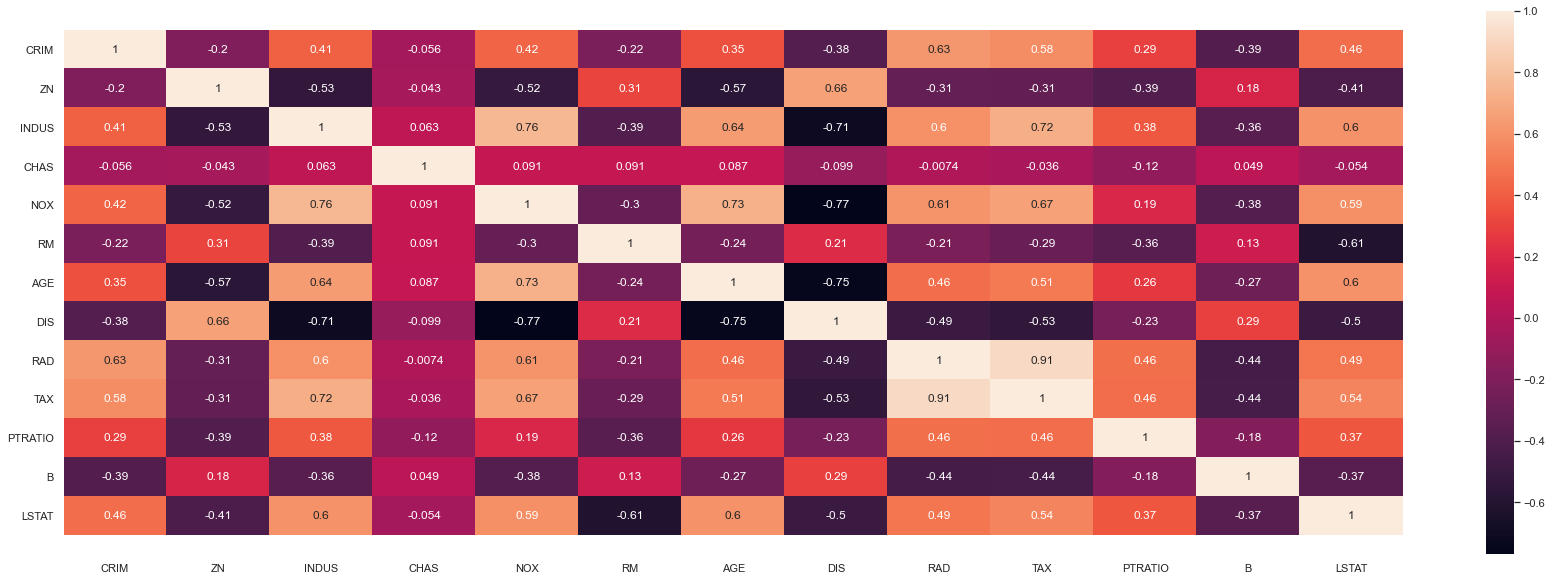

In [118]:
draw_pearson(dataset, load_boston().feature_names)

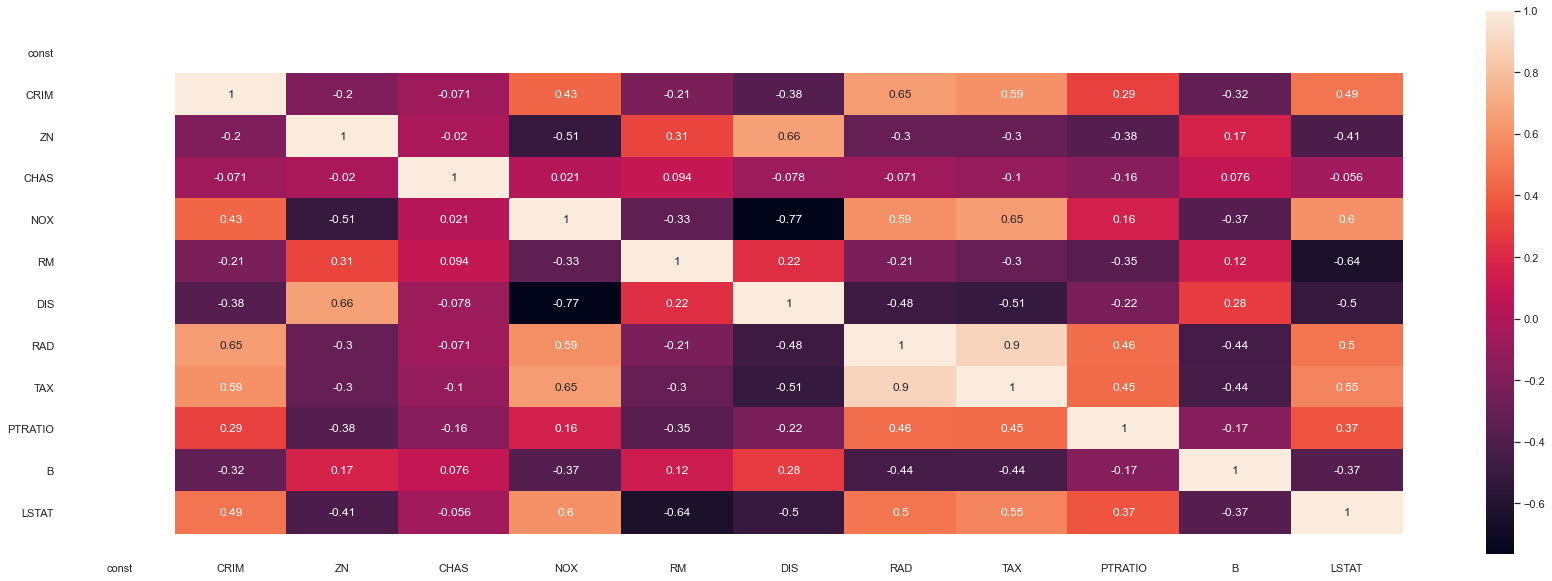

In [119]:
draw_pearson(X_train, X_train.columns)

In [120]:
def vif(variables):
    """
    La función VIF calcula el Factor de Inflación de la Varianza (VIF) para analizar la multicolinealidad de variables independientes.
    
    Se dice que existe multicolinealidad cuando una variable predictora en un modelo de regresión multivariante puede ser predicha en un amplio porcentaje por otras, o dicho de otra manera, cuando existe una gran correlación entre diferentes variables predictoras.

    Para evaluar la multicolinealidad, además del análisis de la correlación entre las variables predictoras, se puede usar el denominado Factor de Inflación de la varianza (VIF). El VIF mide cuánto aumenta la varianza de un coeficiente de regresión estimado si los predictores están correlacionados.

    Por lo general, si los resultados devueltos por el VIF son:
        - Menor o igual a 1: No hay correlación con esa variable.
        - Entre 1 y 5: Existe una correlación moderada con esa variable.
        - Mayor de 5: Hay una alta correlación de esa variable con tras variables exógenas.
    
    -------------
    |REQUIREMENTS|
    -------------
    
    Esta función exige que se le introduca un DataFrame con las variables

    """
    
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = variables.columns
    vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
    vif.sort_values("VIF",ascending=False, inplace=True)
    

    return(vif)

In [121]:
vif(X_train)

,variables,VIF
0,const,617.292061
8,TAX,6.220922
7,RAD,6.117758
4,NOX,3.728317
6,DIS,3.369631
11,LSTAT,2.823207
2,ZN,2.151989
5,RM,1.946821
1,CRIM,1.877294
9,PTRATIO,1.777470


In [127]:
print('Parameters: ', modelo.params)
print('Standard errors: ', modelo.bse)
print('Predicted values: ', modelo.predict())

Parameters:  const      23.975648
CRIM       -0.123577
ZN          0.031517
CHAS        2.786771
NOX       -15.694933
RM          5.162471
DIS        -1.243078
RAD         0.262956
TAX        -0.011063
PTRATIO    -0.917857
B           0.009897
LSTAT      -0.405277
dtype: float64
Standard errors:  const      5.566247
CRIM       0.037418
ZN         0.014059
CHAS       0.909981
NOX        3.748307
RM         0.442638
DIS        0.192966
RAD        0.065214
TAX        0.003363
PTRATIO    0.137837
B          0.002963
LSTAT      0.051794
dtype: float64
Predicted values:  [16.11587023 19.82933464 21.28837681 15.6305409  12.53324112 25.51656982
 24.73080369 21.45671306 16.46532607 25.51693345 19.36053747 21.08669271
  8.59039566 24.92722401 13.70194232 29.2578816  18.25836726 20.69365013
 17.1559567  24.54191373 24.73858543 36.40628459 14.62207891 33.48249442
 21.87478788 28.40161894 36.20334838 31.81122414 22.22989298 21.81374427
 20.46161031 28.54020957 24.99343543 16.14385119 34.37365901 32

In [129]:
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
355,16.115870,1.191869,13.772615,18.459125,6.957842,25.273898
460,19.829335,0.655923,18.539767,21.118902,10.882737,28.775933
120,21.288377,0.645687,20.018934,22.557819,12.344658,30.232096
346,15.630541,0.815878,14.026496,17.234586,6.633231,24.627851
457,12.533241,1.018545,10.530747,14.535735,3.456424,21.610058
...,...,...,...,...,...,...
67,20.737136,0.530099,19.694942,21.779329,11.822833,29.651438
502,21.943859,0.693995,20.579441,23.308276,12.986166,30.901552
25,13.487711,0.563993,12.378883,14.596540,4.565373,22.410050
196,36.280609,0.875795,34.558766,38.002453,27.261553,45.299666


In [136]:
X_test.drop(columns = ["AGE", "INDUS"], inplace=True)

In [144]:
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
predicciones

357    22.999198
337    19.265784
327    19.773776
13     19.274989
418     4.952320
         ...    
413    10.054021
408    13.697473
80     28.375198
451    20.274743
26     15.746673
Length: 102, dtype: float64

In [145]:
import math
from sklearn.metrics import mean_squared_error

rmse = math.sqrt(mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
       ))
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 5.800875894903627


In [146]:
predicciones

357    22.999198
337    19.265784
327    19.773776
13     19.274989
418     4.952320
         ...    
413    10.054021
408    13.697473
80     28.375198
451    20.274743
26     15.746673
Length: 102, dtype: float64